In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
# import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("cox-violent-parsed_filt.csv")

In [3]:
data = pd.read_csv("cox-violent-parsed.csv")

X = data[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]]
y = data["event"]
# data = data[data["race"] == "African-American"]
data = data[((data["score_text"] == "high") | (data["score_text"] == "medium"))]
# data = data[(data["decile_score"] == "low")]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 3. Perform PCA for feature selection
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA for feature selection
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
# 4. Implement Naive Bayes model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Assuming "decile_score" is the target variable

DecisionTreeClassifier()

In [32]:
# 5. Use SHAP for model analysis
# explainer = shap.Explainer(model)
# shap_values = explainer(data_pca)

# 6. Generate predictions and analyze bias
y_pred = model.predict(X_test)
full_data =  pd.read_csv("cox-violent-parsed.csv")

full_data['prediction'] = 0
for i in range(len(full_data["decile_score"])):
    if full_data['decile_score'][i] > 4: full_data['prediction'][i] = 1
    
# Analyze model bias using SHAP values
# shap.summary_plot(shap_values, data_pca)
# shap.dependence_plot("race", shap_values, data_pca)  # Focus on "race" feature

C:\Users\risha\AppData\Local\Temp\ipykernel_33804\1123559696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if full_data['decile_score'][i] > 4: full_data['prediction'][i] = 1


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\risha\AppData\Local\Temp\ipykernel_33804\681895024.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)
C:\Users\risha\AppData\Local\Temp\ipykernel_33804\681895024.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)
C:\Users\risha\AppData\Local\Temp\ipykernel_33804\681895024.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

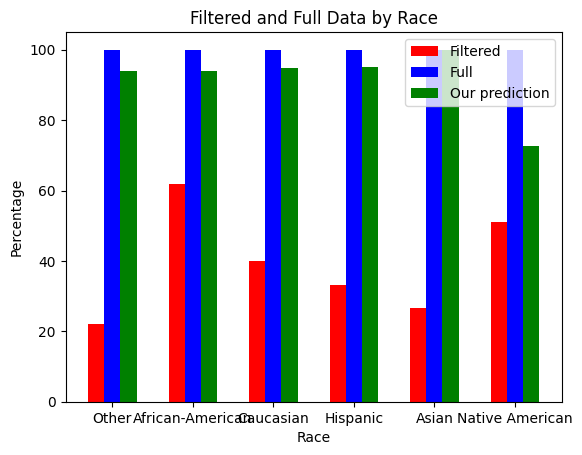

In [47]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a dataframe
df = pd.read_csv("cox-violent-parsed.csv")

# Filter out entries with no indication of recidivism or no compass score
df = df[df['is_recid'] != -1]
df = df[df['decile_score'] != -1]

# Rename recidivism column
df['recidivism_within_2_years'] = df['is_recid']

# Create a list of races
races = df['race'].unique()

# Create an empty list to store the percentages of filtered data for each race
percentages = []
percentages1 = []

# Loop through each race
for race in races:
    # Select the data for the current race
    full_data = df[df['race'] == race]
    
    # Generate the prediction column based on the decile score
    full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)
    
    # Create a mask to filter out the false positives
    mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)
    
    # Apply the mask to the dataframe
    filtered_data = full_data[mask]
    
    # Calculate the percentage of filtered data and append it to the list
    percentage = filtered_data.size / full_data.size * 100
    percentages.append(percentage)

    X = full_data[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]]
    y = full_data["event"]
    # data = data[data["race"] == "African-American"]
    full_data = full_data[((full_data["score_text"] == "high") | (full_data["score_text"] == "medium"))]
    # data = data[(data["decile_score"] == "low")]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Perform PCA for feature selection
    pca = PCA(n_components=4)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    percentage1 = accuracy_score(y_test, y_pred) * 100
    percentages1.append(percentage1)


# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Filtered and Full Data by Race")
ax.set_xlabel("Race")
ax.set_ylabel("Percentage")

# Create a list of x positions for each race
x_pos = range(len(races))

# Plot the filtered data in red and the full data in blue as adjacent bars
ax.bar(x_pos, percentages, color="red", label="Filtered", width=0.2)
ax.bar([x + 0.2 for x in x_pos], [100] * len(races), color="blue", label="Full", width=0.2)
ax.bar([x + 0.4 for x in x_pos], percentages1, color="green", label="Our prediction", width=0.2)

# Set the x ticks and labels
ax.set_xticks([x + 0.2 for x in x_pos])
ax.set_xticklabels(races)

# Add a legend
ax.legend()

# Show the graph
plt.show()